# Model Evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Regularization Analysis

Regularization assigns a penalty to the size of the weight parameters $\mathbf{W}$. In particular, the cross entropy cost function with L2 regularization is given by

$$
C(\mathbf{W},b,\alpha) = -\frac{1}{N} \sum_{k=0}^{N-1} \left( y_k \log( \sigma(\mathbf{x}_k; \mathbf{W},b) ) + (1 - y_k)\log(1 - \sigma(\mathbf{x}_k; \mathbf{W},b)) \right) + \alpha \Vert \mathbf{W} \Vert^2
$$

How do we choose a value for the parameter $\alpha$? One way is to divide the cost into the contribution of the cross entropy $CE$ and the regularization $R$ given by

$$
C(\mathbf{W},b,\alpha) = CE + \alpha R
$$

where

$$
CE = -\frac{1}{N} \sum_{k=0}^{N-1} \left( y_k \log( \sigma(\mathbf{x}_k; \mathbf{W},b) ) + (1 - y_k)\log(1 - \sigma(\mathbf{x}_k; \mathbf{W},b)) \right)
$$

and

$$
R = \Vert \mathbf{W} \Vert^2
$$

Then we can fit models for different values $\alpha$ and plot $CE$ versus $R$ to see how the parameter $\alpha$ changes the values $CE$ and $R$.

Let's choose a regularization parameter for the iris data in `sklearn`. Import the data and assign the target value $y=1$ to the targets with value $y=2$ so that we have a binary target variable $y$ which corresponds to $y=0$ if the species is *setosa* and $y=1$ if the species is *versicolor* or *virginica*.

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
y[y == 2] = 1

We will fit the model using the function `sklearn.linera_model.LogisticRegression` and we can create our own function to compute the cross entropy cost explicitly:

In [5]:
def costCE(W,b,X,y):
    N,p = X.shape
    W = np.array(W).reshape(p,1)
    y = np.array(y).reshape(N,1)
    S = 1/(1 + np.exp(-(X@W + b)))
    L = -1/N*np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    return L

In [6]:
costCE([1,1,1,1],1,X,y)

3.714006701644377

The model `LogisticRegression` uses L2 regularization with parameter $C=1/\alpha$. Let's do an example with $\alpha=2$.

In [10]:
alpha = 2.
model = LogisticRegression(C=1/alpha).fit(X,y)
W = model.coef_
b = model.intercept_
print('W =',W)
print('b =',b)

W = [[ 0.42080836 -0.71913036  1.99323526  0.82238268]]
b = [-6.13816229]


In [11]:
costCE(W,b,X,y)

0.02449790574107641

Compute the costs $CE$ and $R$ for models fit with different values of the parameter $\alpha$ and plot $CE$ versus $R$.

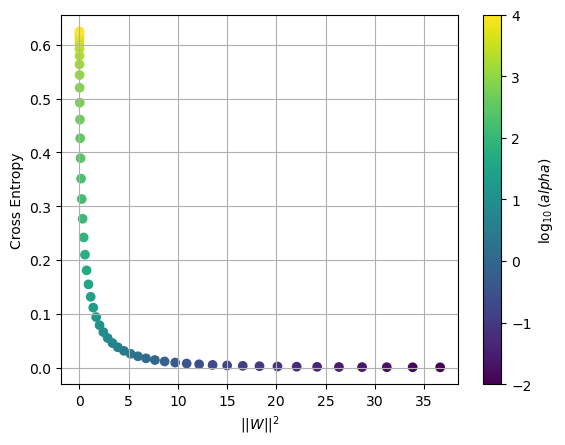

In [35]:
CEs = []
Rs = []
alphas = np.logspace(-2,4,50)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha).fit(X,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

We can see that when $\alpha = 10^4$ the model parameters $\mathbf{W}$ are very small but the cross entropy is very high. The ultimate goal is to fit the data and so we want to reduce $CE$. However once we get to $\alpha = 10^{-1}$ the weaker regularization allows for larger values $\mathbf{W}$ and the $CE$ is near 0. Therefore we choose $\alpha = 10^{-1}$ to get a result where $CE$ is low and the norm $\Vert \mathbf{W} \Vert$ is not too large.

In [42]:
alpha = 0.1
model = LogisticRegression(C=1/alpha).fit(X,y)
W = model.coef_
b = model.intercept_
CE = costCE(W,b,X,y)
R = np.linalg.norm(W)**2
print('Cross entropy cost  =',CE)
print('Regularization cost =',R)

Cross entropy cost  = 0.002626343060982579
Regularization cost = 17.99745208003618


## Model Testing

Once we have a fit a logistic model, how do we determine if it is a good model? The cross entropy cost function measures how well the model fits the training data but how well does our model predict on new data?

One strategy to test the accuracy of our models is to split the available data into a training set and a testing set. The idea is to randomly choose a fraction of our data to fit our model and then use the remainder to test the accuracy. The function `sklearn.model_selection.train_test_split` splits the data `X` and `y` into a training set and a testing set. How much should be in each set? There is no perfect answer but usually it's good to start with about 1/3 of the data in the testing set.

Let's build a model to classify images of digits. The function `sklearn.datasets.load_digits` loads a data set where each sample is a 8 by 8 pixel image of a handwritten digit. When flattened, each sample is a vector in $\mathbb{R}^{64}$.

In [128]:
from sklearn.datasets import load_digits

In [129]:
digits = load_digits()
X = digits.data

In [130]:
X.shape

(1797, 64)

In [131]:
y = digits.target

In [132]:
y.shape

(1797,)

There are 1797 samples in the dataset. Let's take a look at the first row reshaped into a 8 by 8 matrix.

In [137]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Let's visualize the matrix as a 8 by 8 pixel image.

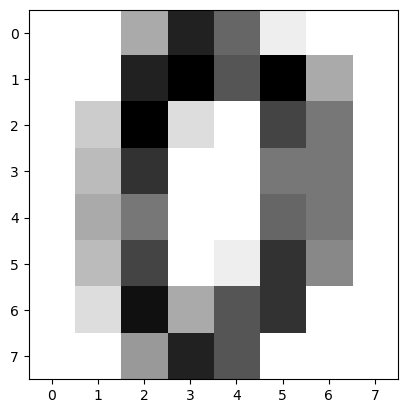

In [138]:
plt.imshow(X[0].reshape(8,8),cmap='binary')
plt.show()

The first sample is an image of the digit 0. Let's verify that the target is $y=0$ at index 0.

In [140]:
y[0]

0

Let's try another sample say index 251.

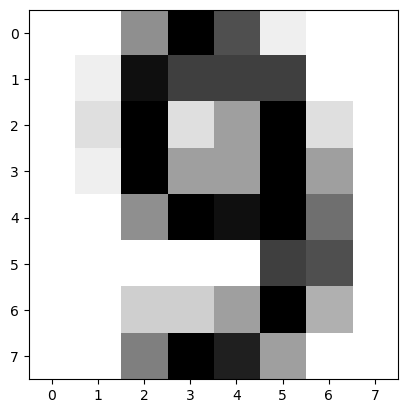

In [148]:
plt.imshow(X[251].reshape(8,8),cmap='binary')
plt.show()

Looks like a 9. Check the target value at index 251.

In [150]:
y[251]

9

The entries in $X$ are integers between 0 and 16. It will be helpful to scale the values to number between 0 and 1.

In [151]:
X = X/16

Let's build a model which can classify a digit as the number 1 or not. Start by changing all the targets $y \not= 1$ to $y=0$.

In [152]:
y[y != 1] = 0

Now the target variable corresponds to $y=1$ if the digit is 1 and $y=0$ if not.

Let's fit a logistic regression model to the entire dataset for different regularization paraemters and observe the error as we did above.

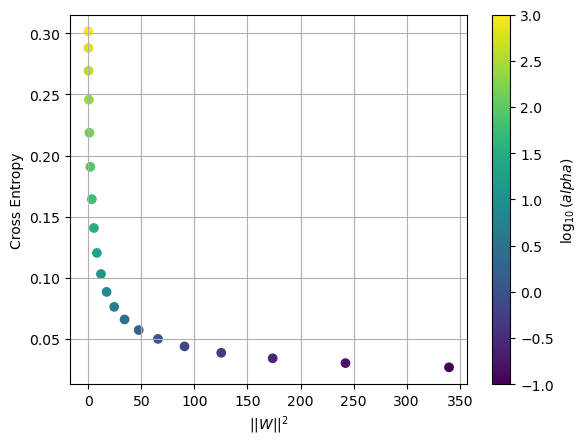

In [163]:
CEs = []
Rs = []
alphas = np.logspace(-1,3,20)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha).fit(X,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

It looks like reducing the regularization parameter $\alpha$ beyond 0.1 produces large weight parameters and so we choose $\alpha = 1$.

Now let's split the data into a training set and a testing set.

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

In [175]:
X_test.shape

(599, 64)

Verify that the size is 1/3 of the original data.

In [176]:
1797/3

599.0

Let's use $\alpha = 1$ to fit the logistic regression model to the training data.

In [181]:
model = LogisticRegression(C=1.).fit(X_train,y_train)

Finally, we can compute the accuracy of our model. The function `model.score` computes the fraction of correctly classified samples in the testing set.

In [184]:
model.score(X_test,y_test)

0.9749582637729549

:::{seealso}
Check out [sklearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html) on cross-validation to learn more.
:::